# Comparasion of Conventional and Neural Network Classifiers for Sentiment Analysis of Movie Reviews
Melih Kağan Özçelik


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
dataset = pd.read_csv('IMDB_Dataset.csv')
print(dataset.shape)
dataset['sentiment'].value_counts()

(50000, 2)


sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [35]:
import texthero as hero
hero.top_words(dataset['review']).head(10)

review
the     572984
a       308827
and     308197
of      285098
to      263640
is      208643
br      199135
in      173169
I       143386
that    132890
Name: count, dtype: int64

Most of the top words are stopwords or tags like <br>

In [36]:
import string
import nltk
from nltk.corpus import stopwords

positive_reviews = dataset[dataset['sentiment'] == "positive"]['review']
negative_reviews = dataset[dataset['sentiment'] == "negative"]['review']

counf_of_punc_positive = positive_reviews.apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
counf_of_punc_negative = negative_reviews.apply(lambda z: len([c for c in str(z) if c in string.punctuation]))

count_of_stopwords_positive = positive_reviews.apply(lambda z: len([w for w in str(z).lower().split() if w in stopwords.words('english')]))
count_of_stopwords_negative = negative_reviews.apply(lambda z: len([w for w in str(z).lower().split() if w in stopwords.words('english')]))

C:\Users\melih\anaconda3\envs\tensorf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melih\anaconda3\envs\tensorf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


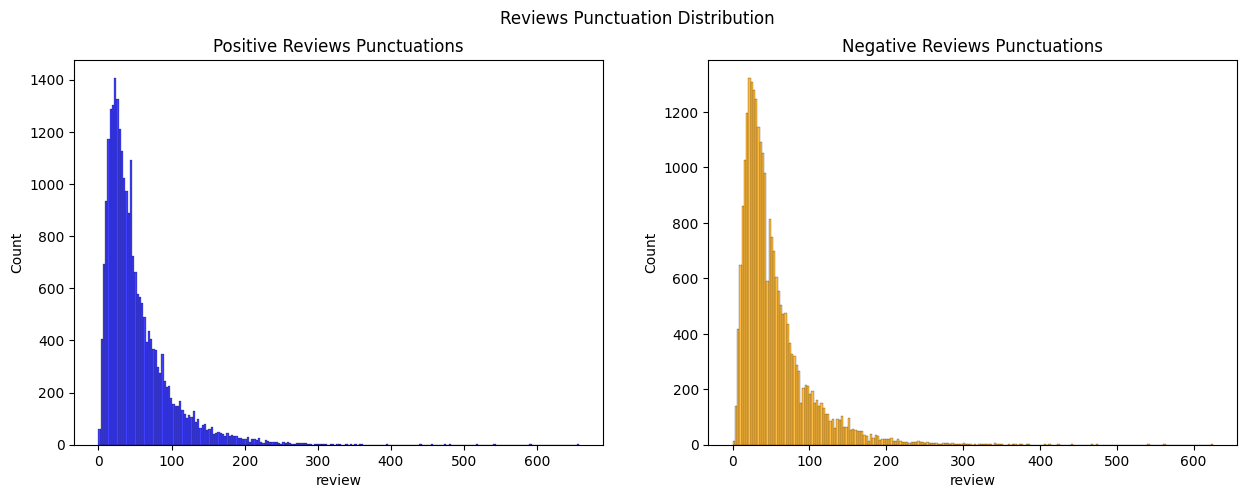

C:\Users\melih\anaconda3\envs\tensorf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\melih\anaconda3\envs\tensorf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


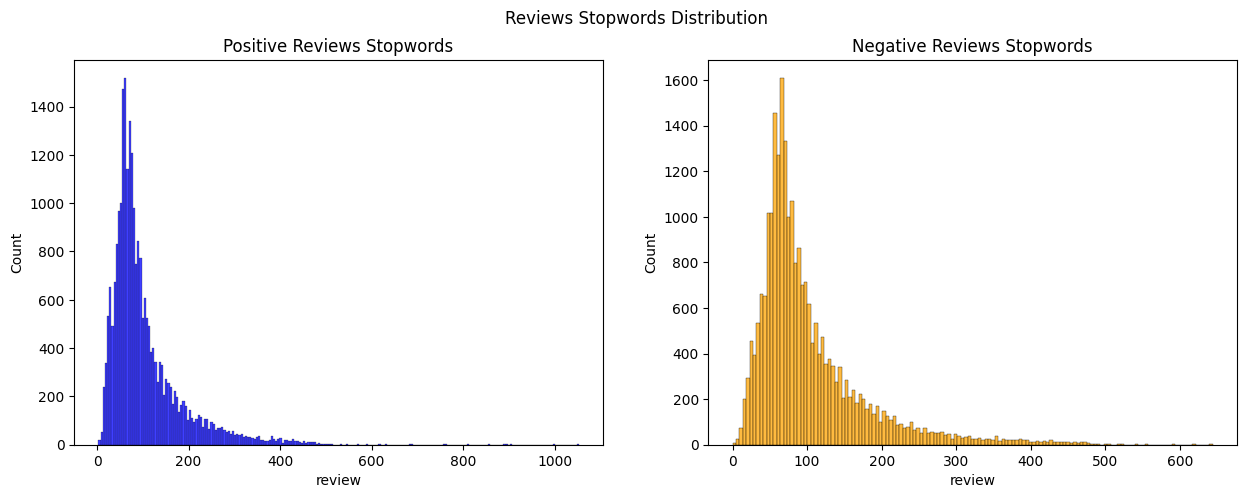

In [38]:
#Plot the distributions of stopwords, punctuations for both positive and negative reviews to see if dataset is balanced
def plot_dist(count_pos,count_neg,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.histplot(count_pos,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.histplot(count_neg,ax=ax2,color='Orange')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()

plot_dist(counf_of_punc_positive,counf_of_punc_negative,
           "Positive Reviews Punctuations","Negative Reviews Punctuations","Reviews Punctuation Distribution")
plot_dist(count_of_stopwords_positive,count_of_stopwords_negative,
             "Positive Reviews Stopwords","Negative Reviews Stopwords","Reviews Stopwords Distribution")

In [39]:
#Split test train before cleaning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
dataset['sentiment']= le.fit_transform(dataset['sentiment'])
train, test = train_test_split(dataset, test_size = 0.2, random_state=57)
dataset['sentiment'].head(10)

0    1
1    1
2    1
3    0
4    1
5    1
6    1
7    0
8    0
9    1
Name: sentiment, dtype: int32

# Text Preprocessing

In [42]:
from texthero import preprocessing
import re

def fix_constraints(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    return data

custom_pipeline = [preprocessing.lowercase,
                  preprocessing.remove_html_tags,
                  preprocessing.remove_punctuation,
                  preprocessing.remove_urls]

#Clean tags urls punct ,correct pronouns like we're we are
train['review'] = train['review'].apply(lambda z: fix_constraints(z))
cleaned_data = train['review'].pipe(hero.clean, custom_pipeline)
train = train.assign(review_cleaned = cleaned_data.values)
print(train.head(10))

                                                  review  sentiment  \
21101  The opening scenes move as fluidly as frozen v...          0   
18070  To a certain extent, I actually liked this fil...          1   
26609  This film's trailer interested me enough to wa...          0   
29168  After losing his cattle herd to a dishonest la...          1   
20278  lets start off by saying that "JAWANI DIWANI" ...          0   
29797  The only reason I saw this movie was because i...          0   
834    I do regret that I have bought this series. I ...          0   
45034  Never having seen this movie, based on the ent...          1   
20179  I really like Star Trek Hidden Frontier it is ...          1   
17741  This is a Hollywood film. The credentials of t...          1   

                                          review_cleaned  
21101  the opening scenes move as fluidly as frozen v...  
18070  to a certain extent  i actually liked this fil...  
26609  this film s trailer interested me 

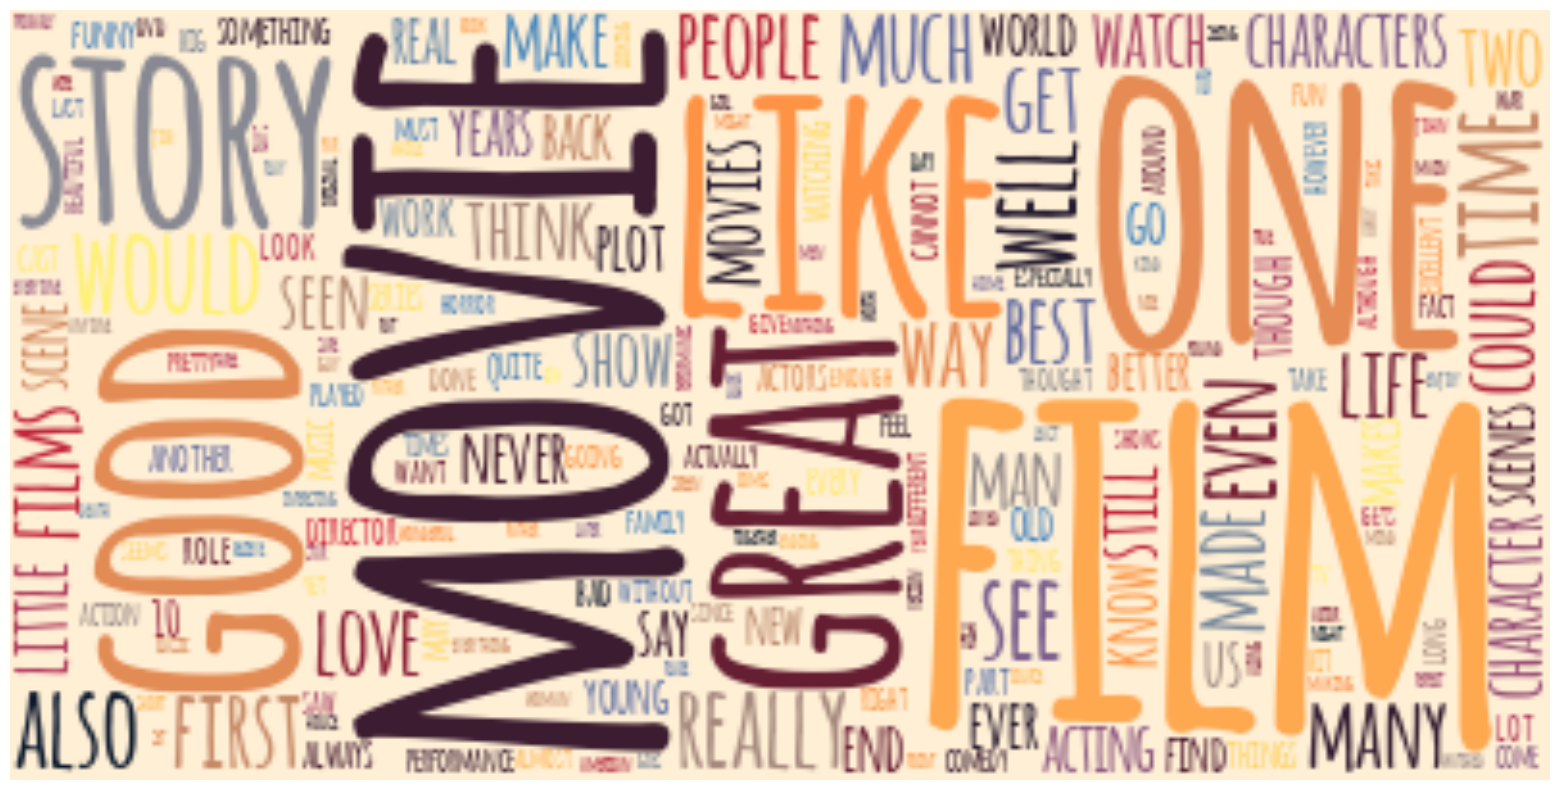

In [6]:
#world cloud with cleaned data
positive_reviews = train[train['sentiment'] == 1]['review_cleaned']
negative_reviews = train[train['sentiment'] == 0]['review_cleaned']

#Although stopwords were not removed when training the models, 
#they were removed to see more meaningful results for gram analyses and word clouds.
positive_reviews = hero.remove_stopwords(positive_reviews)
negative_reviews = hero.remove_stopwords(negative_reviews)

hero.wordcloud(positive_reviews, font_path='Amatic-Bold.ttf')

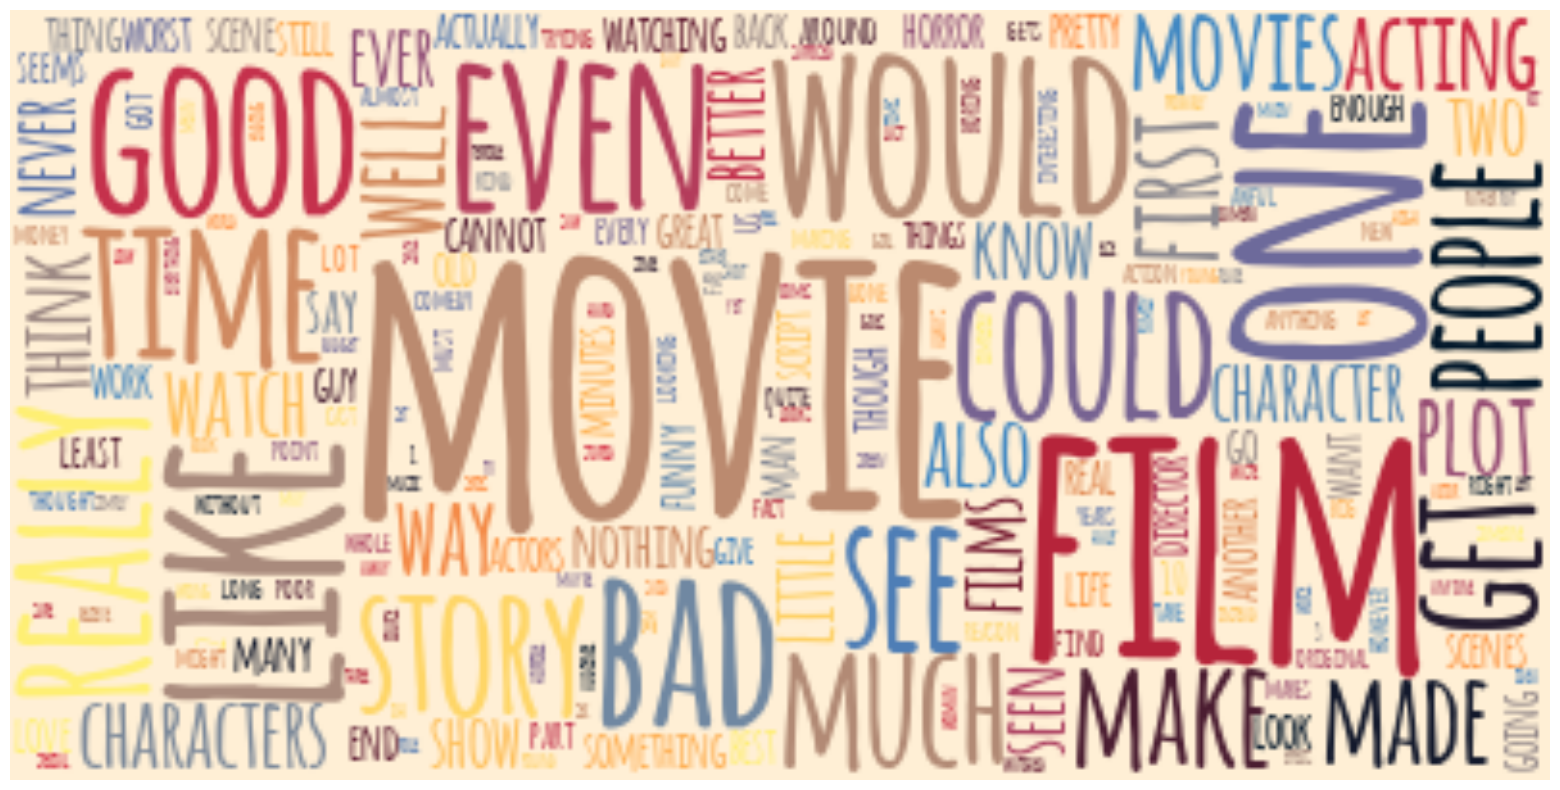

In [7]:
hero.wordcloud(negative_reviews, font_path='Amatic-Bold.ttf')

In [8]:
from nltk import ngrams
import matplotlib.pyplot as plt
from collections import Counter

def get_ngrams(texts, n):
    """Generates n-grams from a list of texts."""
    ngrams_list = []
    for text in texts:
        tokens = text.split()
        ngrams_list.extend(ngrams(tokens, n))
        
    """Counts the frequency of n-grams in a list."""
    count_ngrams = Counter()
    for ngram in ngrams_list:
        count_ngrams[ngram] += 1
        
    df = pd.DataFrame.from_dict(count_ngrams, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)
    
def plot_ngrams(ngram_df, n, title):
    plt.figure(figsize=(12, 6))
    plt.barh(np.arange(len(ngram_df['words'])), ngram_df['count'])
    plt.yticks(np.arange(len(ngram_df['words'])), ngram_df['words'])
    plt.ylabel(f'{n}-grams')
    plt.xlabel('Frequency')
    plt.title(f'Top {n}-grams in {title}')
    plt.show()


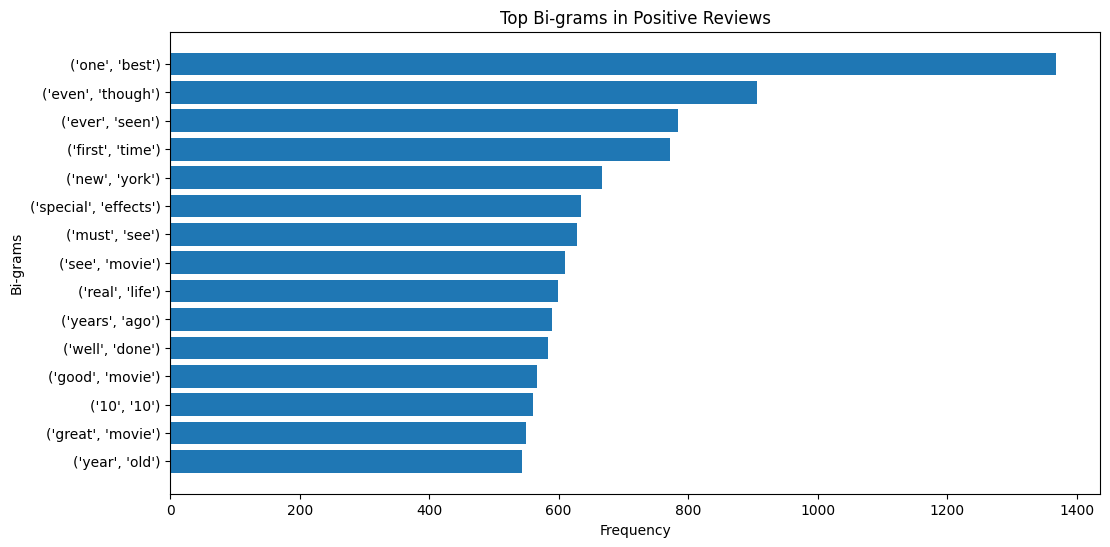

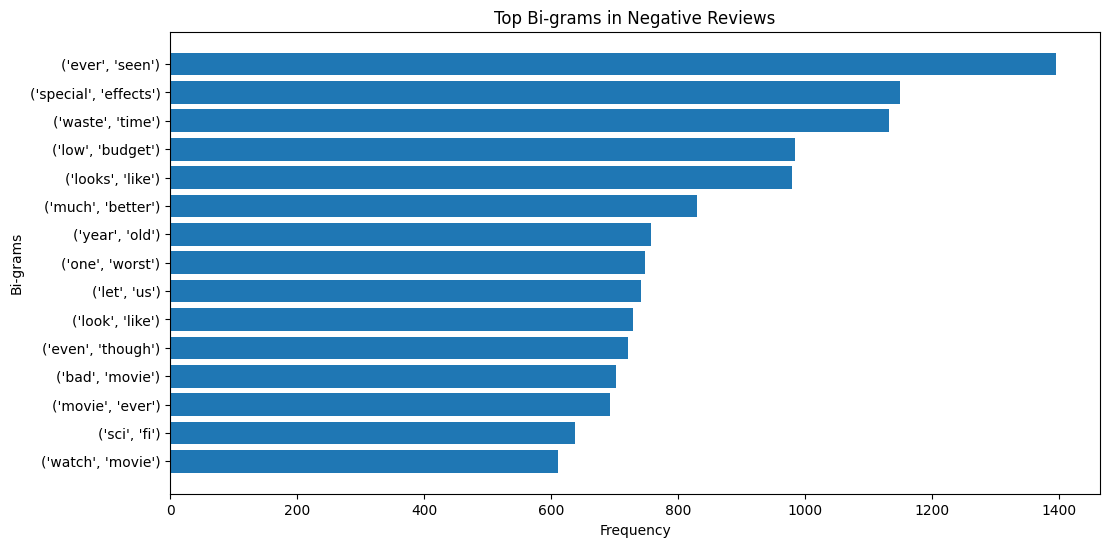

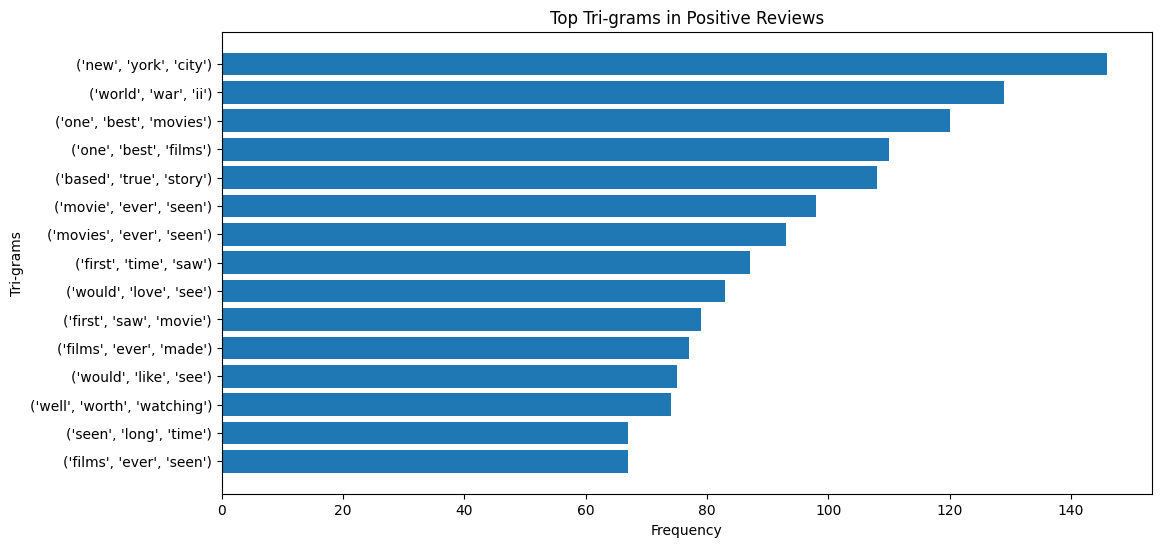

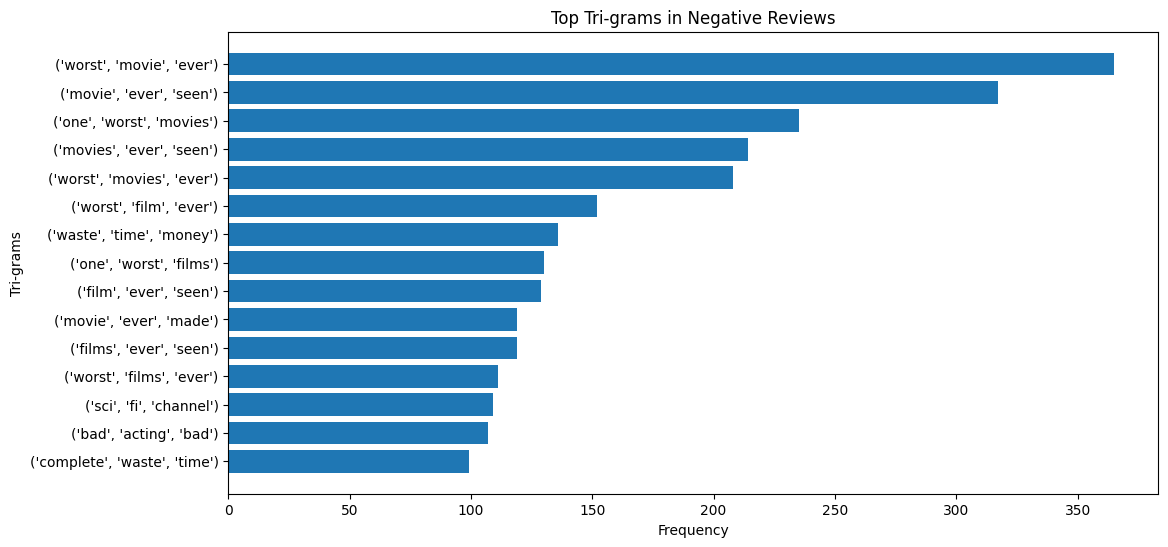

In [9]:
#Plot bigrams positive
plot_ngrams( get_ngrams(positive_reviews.values, 2), 'Bi', 'Positive Reviews')

#Plot bigrams negative
plot_ngrams( get_ngrams(negative_reviews.values, 2), 'Bi', 'Negative Reviews')

#Plot trigrams positive
plot_ngrams( get_ngrams(positive_reviews.values, 3), 'Tri', 'Positive Reviews')

#Plot trigrams negative
plot_ngrams( get_ngrams(negative_reviews.values, 3), 'Tri', 'Negative Reviews')

# Vectorization, Bag of Words and Term Frequency, Inverse Document Frequency

In [43]:
train_x, train_y = train['review_cleaned'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


BoW_vectorizer = CountVectorizer()
TFID_vectorizer = TfidfVectorizer()

train_x_bow_vector = BoW_vectorizer.fit_transform(train_x)
test_x_bow_vector = BoW_vectorizer.transform(test_x)

train_x_tfid_vector = TFID_vectorizer.fit_transform(train_x)
test_x_tfid_vector = TFID_vectorizer.transform(test_x)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def model_Evaluate(model, trainX, trainY, testX, testY):
    #accuracy of model on training and test data
    acc_train=model.score(trainX, trainY)
    acc_test=model.score(testX, testY)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    pred_y = model.predict(testX)

    # Print the evaluation metrics for the dataset.
    print(classification_report(testY, pred_y))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(testY, pred_y)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [45]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Logistic Regression with Bag of Words

C:\Users\melih\anaconda3\envs\tensorf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of model on training data : 97.365
Accuracy of model on testing data : 88.99000000000001 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5019
           1       0.89      0.89      0.89      4981

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

CPU times: total: 18 s
Wall time: 2.56 s


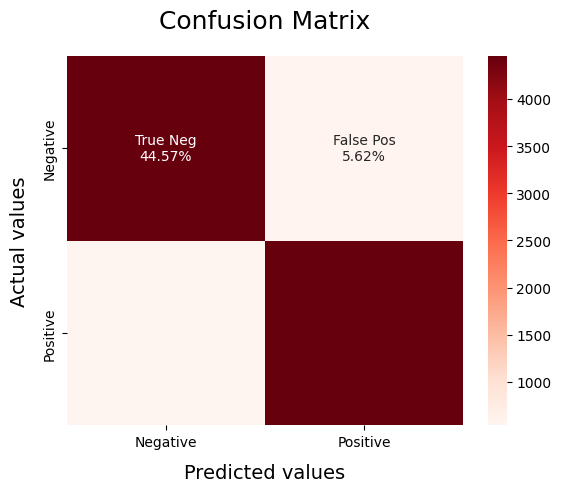

In [14]:
%%time
log_reg = LogisticRegression()
log_reg_bow = log_reg.fit(train_x_bow_vector, train_y)
model_Evaluate(log_reg_bow, train_x_bow_vector, train_y , test_x_bow_vector, test_y)

# Logistic Regression with Inverse Document Frequency

Accuracy of model on training data : 93.10249999999999
Accuracy of model on testing data : 90.25999999999999 

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      5019
           1       0.89      0.92      0.90      4981

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

CPU times: total: 3.47 s
Wall time: 1.42 s


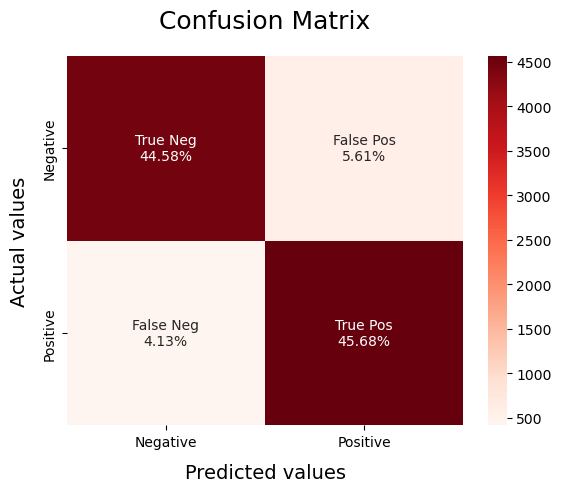

In [96]:
%%time
log_reg_tfid = log_reg.fit(train_x_tfid_vector, train_y)
model_Evaluate(log_reg_tfid, train_x_tfid_vector, train_y , test_x_tfid_vector, test_y)

# Stochastic gradient descent  with Bag of Words

Accuracy of model on training data : 99.41250000000001
Accuracy of model on testing data : 88.96 

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      5019
    positive       0.88      0.90      0.89      4981

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

CPU times: total: 4.59 s
Wall time: 1.81 s


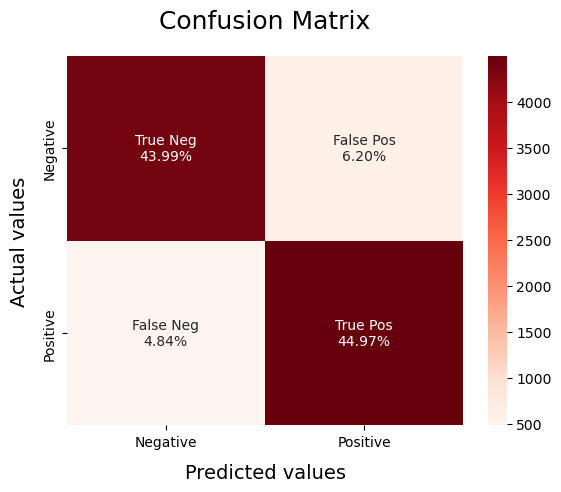

In [14]:
%%time
svm = SGDClassifier(max_iter=500)
svm_bow = svm.fit(train_x_bow_vector, train_y)
model_Evaluate(svm_bow, train_x_bow_vector, train_y , test_x_bow_vector, test_y)

# Stochastic gradient descent  with Inverse Document Frequency

Accuracy of model on training data : 92.495
Accuracy of model on testing data : 90.22 

              precision    recall  f1-score   support

    negative       0.92      0.89      0.90      5019
    positive       0.89      0.92      0.90      4981

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

CPU times: total: 3.27 s
Wall time: 555 ms


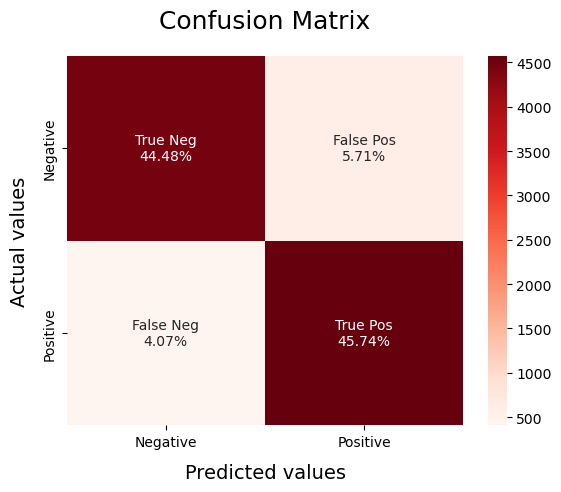

In [15]:
%%time
svm_tfid = svm.fit(train_x_tfid_vector, train_y)
model_Evaluate(svm_tfid, train_x_tfid_vector, train_y , test_x_tfid_vector, test_y)

# Multinomial Naive Bayes with Bag of Words

Accuracy of model on training data : 88.9525
Accuracy of model on testing data : 84.3 

              precision    recall  f1-score   support

    negative       0.86      0.82      0.84      5019
    positive       0.83      0.87      0.85      4981

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

CPU times: total: 438 ms
Wall time: 440 ms


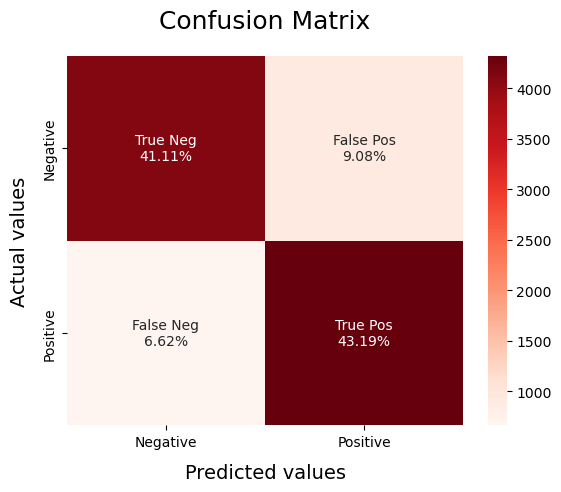

In [16]:
%%time
mnb = MultinomialNB()
mnb_bow = mnb.fit(train_x_bow_vector, train_y)
model_Evaluate(mnb_bow, train_x_bow_vector, train_y , test_x_bow_vector, test_y)

# Multinomial Naive Bayes with Inverse Document Frequency

Accuracy of model on training data : 90.21249999999999
Accuracy of model on testing data : 85.78 

              precision    recall  f1-score   support

    negative       0.87      0.84      0.86      5019
    positive       0.84      0.88      0.86      4981

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Wall time: 401 ms


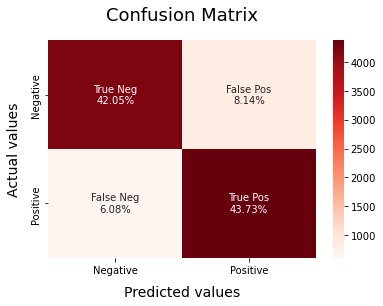

In [20]:
%%time
mnb_tfid = mnb.fit(train_x_tfid_vector, train_y)
model_Evaluate(mnb_tfid, train_x_tfid_vector, train_y , test_x_tfid_vector, test_y)

# Decision Trees: Random Forest Classifier with Bag of Words

Accuracy of model on training data : 99.005
Accuracy of model on testing data : 82.53 

              precision    recall  f1-score   support

    negative       0.84      0.80      0.82      5019
    positive       0.81      0.85      0.83      4981

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Wall time: 19.3 s


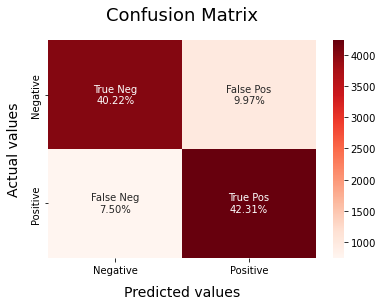

In [21]:
%%time
rf = RandomForestClassifier(n_estimators = 30, criterion = 'gini', max_depth=60)
rf_bow = rf.fit(train_x_bow_vector, train_y)
model_Evaluate(rf_bow, train_x_bow_vector, train_y , test_x_bow_vector, test_y)

# Decision Trees: Random Forest Classifier with Inverse Document Frequency

Accuracy of model on training data : 99.39750000000001
Accuracy of model on testing data : 81.47 

              precision    recall  f1-score   support

    negative       0.86      0.76      0.80      5019
    positive       0.78      0.87      0.82      4981

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

Wall time: 20.7 s


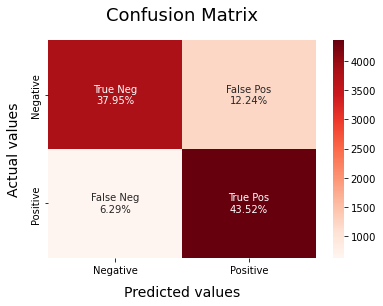

In [22]:
%%time
rf_tfid = rf.fit(train_x_tfid_vector, train_y)
model_Evaluate(rf_tfid, train_x_tfid_vector, train_y , test_x_tfid_vector, test_y)

# Neural Network Classifiers

In [46]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils import pad_sequences
from keras.layers import Embedding,Conv1D,LSTM,Dense

In [104]:
from keras.utils import to_categorical
train_y_labels = to_categorical(train_y, num_classes=2)
test_y_labels = to_categorical(test_y, num_classes=2)
print("train_y shape:", train_y_labels.shape)
print("test_y shape:", test_y_labels.shape)

train_y shape: (40000, 2)
test_y shape: (10000, 2)


## Load Pre-trained word vectors(GloVe) in a dictionary:

In [16]:
from tqdm import tqdm
embeddings_index = {}
f = open('glove.6B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


400000it [00:29, 13551.48it/s]

Found 400000 word vectors.


In [52]:
train['review'].apply(lambda x:len(str(x).split())).max()

2482

In [17]:
#Crate sequences
num_words = 80000
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(train_x)
train_x_seq = tokenizer.texts_to_sequences(train_x)

tokenizer.fit_on_texts(test_x)
test_x_seq = tokenizer.texts_to_sequences(test_x)

max_len=max(max([len(x) for x in train_x_seq]),max([len(x) for x in test_x_seq]))

word_index = tokenizer.word_index
total_vocab=len(word_index) + 1
print("Vocabulary Size :", total_vocab)

train_x_pad = pad_sequences(train_x_seq, maxlen=max_len)
test_x_pad  = pad_sequences(test_x_seq, maxlen=max_len)
print(train_x_pad.shape, test_x_pad.shape)

Vocabulary Size : 112924
(40000, 2498) (10000, 2498)


In [18]:
# create an embedding matrix
EMBEDDING_DIM = 300
embedding_matrix = np.zeros((total_vocab, EMBEDDING_DIM))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████████████████████████████████████████████████████████████████| 112923/112923 [00:00<00:00, 556275.32it/s]


# Sequential Model 1 with glove embeddings, 2 LTSM layers

In [107]:
%%time

model = Sequential()
model.add(Embedding(total_vocab,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(Conv1D(300,10,activation='relu'))
model.add(keras.layers.Bidirectional(LSTM(150,return_sequences=True)))
model.add(LSTM(100))
model.add(keras.layers.Dropout(0.4))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 2498, 300)         33877200  
                                                                 
 conv1d_4 (Conv1D)           (None, 2489, 300)         900300    
                                                                 
 bidirectional_4 (Bidirectio  (None, 2489, 300)        541200    
 nal)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 100)               160400    
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 202       
                                                      

In [108]:
es= EarlyStopping(monitor='val_accuracy',
                  patience=2
                 )

checkpoints=ModelCheckpoint(filepath='./',
                            monitor="val_accuracy",
                            verbose=0,
                            save_best_only=True
                           )

callbacks=[es,checkpoints]

In [109]:
X_train,X_val,Y_train,Y_val=train_test_split(train_x_pad,train_y_labels,
                                             test_size=0.05,random_state=10)

In [110]:
history=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=5,callbacks=callbacks)

Epoch 1/5
1188/1188 [==============================] - ETA: 0s - loss: 0.6455 - accuracy: 0.6078

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


1188/1188 [==============================] - 6214s 5s/step - loss: 0.6455 - accuracy: 0.6078 - val_loss: 0.5341 - val_accuracy: 0.7435
Epoch 2/5
1188/1188 [==============================] - ETA: 0s - loss: 0.4767 - accuracy: 0.7685

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


1188/1188 [==============================] - 6117s 5s/step - loss: 0.4767 - accuracy: 0.7685 - val_loss: 0.5077 - val_accuracy: 0.7550
Epoch 3/5
1188/1188 [==============================] - ETA: 0s - loss: 0.3381 - accuracy: 0.8525

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


1188/1188 [==============================] - 8188s 7s/step - loss: 0.3381 - accuracy: 0.8525 - val_loss: 0.4152 - val_accuracy: 0.8025
Epoch 4/5
1188/1188 [==============================] - ETA: 0s - loss: 0.2012 - accuracy: 0.9201 

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


1188/1188 [==============================] - 18256s 15s/step - loss: 0.2012 - accuracy: 0.9201 - val_loss: 0.5213 - val_accuracy: 0.8110
Epoch 5/5
1188/1188 [==============================] - 11555s 10s/step - loss: 0.1083 - accuracy: 0.9604 - val_loss: 0.6578 - val_accuracy: 0.7855


In [47]:
def plot_graph(history,string):
    
    plt.plot(history.history[string],label='training '+string)
    plt.plot(history.history['val_'+string],label='validation '+string)
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.title(string+' vs epochs')
    plt.show()

In [112]:
model.save('saved_models/LTSMwGloVe')
print("Model Performance on test set")
result = model.evaluate(test_x_pad,test_y_labels)
print(dict(zip(model.metrics_names, result)))

INFO:tensorflow:Assets written to: saved_models/LTSMwGloVe\assets


INFO:tensorflow:Assets written to: saved_models/LTSMwGloVe\assets


Model Performance on test set
313/313 [==============================] - 1210s 4s/step - loss: 1.2646 - accuracy: 0.6441
{'loss': 1.2645725011825562, 'accuracy': 0.64410001039505}


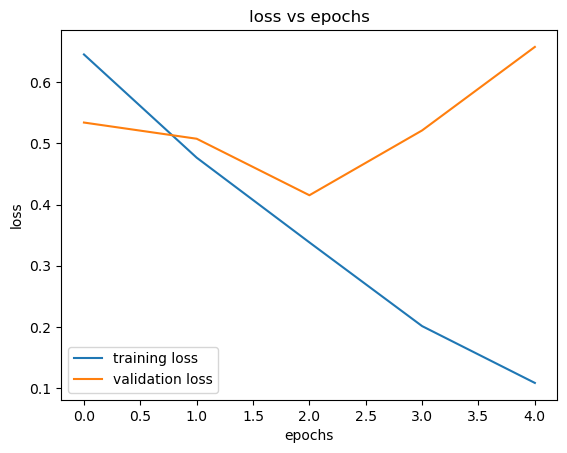

In [113]:
plot_graph(history,'loss')

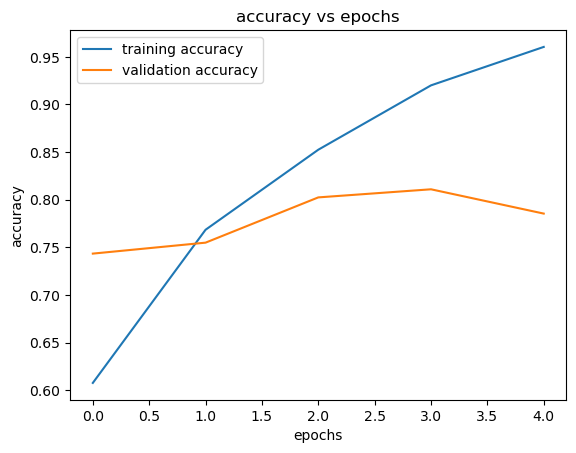

In [114]:
plot_graph(history,'accuracy')

# Sequential Model 2 with glove embeddings, LTSM one dense layer

In [20]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
model_2 = Sequential()
model_2.add(Embedding(total_vocab,
                     EMBEDDING_DIM,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model_2.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2498, 300)         33877200  
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 34,037,701
Trainable params: 160,501
Non-trainable params: 33,877,200
_________________________________________________________________


In [22]:
X_train,X_val,Y_train,Y_val=train_test_split(train_x_pad,train_y,
                                             test_size=0.1,random_state=10)

In [24]:
history_2 = model_2.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=5)

Epoch 1/5
1125/1125 [==============================] - 13799s 12s/step - loss: 0.6390 - accuracy: 0.6202 - val_loss: 0.5599 - val_accuracy: 0.7107
Epoch 2/5
1125/1125 [==============================] - 14816s 13s/step - loss: 0.4973 - accuracy: 0.7539 - val_loss: 0.4277 - val_accuracy: 0.8020
Epoch 3/5
1125/1125 [==============================] - 20911s 19s/step - loss: 0.3938 - accuracy: 0.8196 - val_loss: 0.3465 - val_accuracy: 0.8505
Epoch 4/5
1125/1125 [==============================] - 15060s 13s/step - loss: 0.3455 - accuracy: 0.8471 - val_loss: 0.3535 - val_accuracy: 0.8485
Epoch 5/5
1125/1125 [==============================] - 14819s 13s/step - loss: 0.3067 - accuracy: 0.8672 - val_loss: 0.3204 - val_accuracy: 0.8662


313/313 [==============================] - 852s 3s/step
Auc: 0.73%
313/313 [==============================] - 872s 3s/step - loss: 0.6167 - accuracy: 0.6711
Model Performance on test set
{'loss': 0.616698145866394, 'accuracy': 0.6711000204086304}


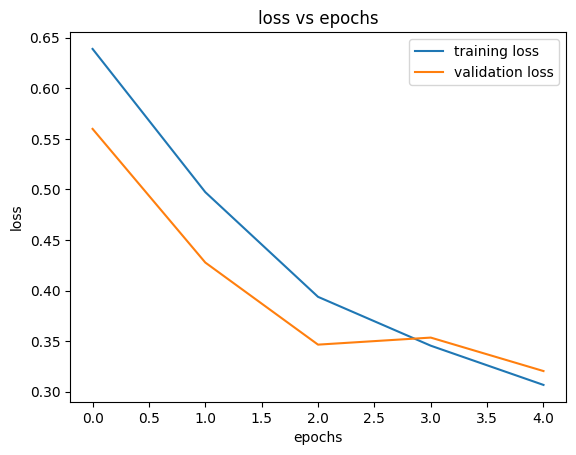

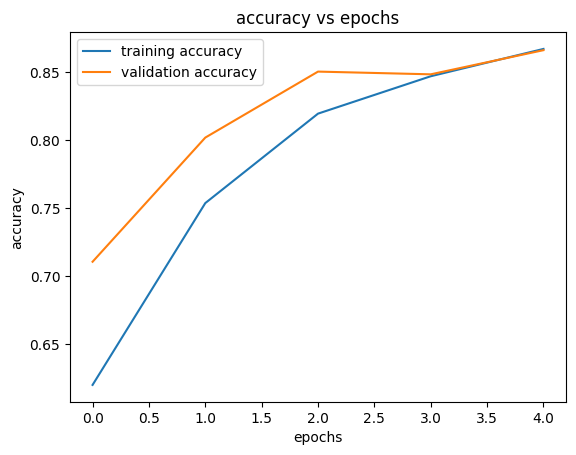

INFO:tensorflow:Assets written to: saved_models/Model_2_Glove_LTSM_Dense\assets


In [48]:
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc


scores = model_2.predict(test_x_pad)
print("Auc: %.2f%%" % (roc_auc(scores,test_y)))
result = model_2.evaluate(test_x_pad,test_y)
print("Model Performance on test set")
print(dict(zip(model_2.metrics_names, result)))
plot_graph(history_2,'loss')
plot_graph(history_2,'accuracy')
model_2.save('saved_models/Model_2_Glove_LTSM_Dense')

# Bidirectional Encoder Representations from Transformers (BERT)

In [55]:
from tokenizers import BertWordPieceTokenizer
import transformers

# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased' , lower = True)
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=True)
fast_tokenizer


C:\Users\melih\anaconda3\envs\tensorf-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\melih\anaconda3\envs\tensorf-gpu\lib\site-packages\huggingface_hub\file_download.py:137: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\melih\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

In [58]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [59]:
train_x_encoded = fast_encode(train_x.values, fast_tokenizer)
test_x_encoded = fast_encode(test_x.values, fast_tokenizer)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:01<00:00, 30.51it/s]


In [62]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
bert_model = transformers.TFDistilBertModel.from_pretrained('distilbert-base-uncased')
input_word_ids = Input(shape=(512,), dtype=tf.int32, name="input_word_ids")
sequence_output = bert_model(input_word_ids)[0]
cls_token = sequence_output[:, 0, :]
out = Dense(1, activation='sigmoid')(cls_token)
    
model_3 = Model(inputs=input_word_ids, outputs=out)
model_3.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

model_3.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 512)]            0         
                                                                 
 tf_distil_bert_model_2 (TFD  TFBaseModelOutput(last_h  66362880 
 istilBertModel)             idden_state=(None, 512,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem_1   (None, 768)              0         
 (SlicingOpLambda)                                               
                                                                 
 dense_2 (Dense)             (None, 1)                 769       
                                                           

C:\Users\melih\anaconda3\envs\tensorf-gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(train_x_encoded,train_y,
                                             test_size=0.1,random_state=10)

In [ ]:
history_3 = model_3.fit(X_train,Y_train, batch_size = 32 ,validation_data=(X_val,Y_val),epochs = 5)

In [ ]:
scores = model_3.predict(test_x_encoded)
print("Auc: %.2f%%" % (roc_auc(scores,test_y)))
result = model_3.evaluate(test_x_encoded,test_y)
print("Model Performance on test set")
print(dict(zip(model_3.metrics_names, result)))
plot_graph(history_3,'loss')
plot_graph(history_3,'accuracy')
model_3.save('saved_models/Model_3_BERT')

# COMMENTS
* Train and test samples splitted before text preprocessing to ensure the true unseen nature of the test set.
* Punctuations/urls/html tags are present in a equal distribution in the dataset and cleaned.
* Stopwords were not cleaned because they did not affect the performance much:

| Method        | With Stopwords | Without Stopwords |
|----------------|----------------|-------------------|
| LogREG bow    | 88.99          | 88.84             |
| LogREG tfid   | 90.26          | 90.36             |
| SGDC bow      | 88.92          | 88.19             |
| SGDC tfid     | 90.29          | 90.10             |
| Bayes bow     | 84.30          | 84.85             |
| Bayes-tfid    | 85.78          | 85.57             |
| RanFor-bow    | 82.46          | 83.67             |
| Ranfor-tfid   | 80.08          | 83.08     

* TF/IDF gives better performance generally.
* Training NN's takes too much time and consume too much energy :(
* Classic ML approaches seems very effective for basic sentiment analysis considering the training time        |
